분석 목표 : 넷플릭스에서 보유한 콘텐츠 현황과 최근 집중적으로 수급하는 콘텐츠 유형을 파악해 넷플릭스의 시장 점유 전략을 분석한다.

데이터 출처 : [Netflix Movies and TV Shows | Kaggle](https://www.kaggle.com/shivamb/netflix-shows)

---
## 1. 가설 설정

각 컬럼별 유효 데이터와 결측치 분포를 확인하고, 이에 따라 분석 목표에 도달하기 위한 가설을 설정한다.

In [93]:
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [94]:
netflix_r = pd.read_csv('./data/netflix_titles.csv')
netflix_r

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [95]:
netflix_r.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

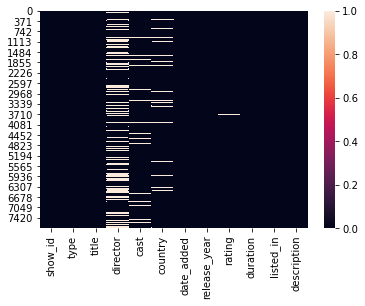

In [96]:
sns.heatmap(netflix_r.isnull());

- `show_id` : 해당 데이터셋 이외에 병합할 테이블이 없기 때문에 id 컬럼은 제거한다.
- `director`: 감독에 대한 정보는 고려하지 않겠다.
- `cast`: 배우 역시 고려하지 않겠다.


본 데이터에서 검증하고자 하는 가설은 아래와 같다.(H1 = 연구가설)

1. H1 : 최근 특정 콘텐츠 유형(TV show or Movie)이 늘고 있다. (주요 컬럼 : type)
2. H1 : 최근 특정 국가의 콘텐츠 비중이 늘고 있다. (주요 컬럼 : country)
3. H1 : 최근 옛날(오래된) 콘텐츠 수급 비중이 늘고 있다. (주요 컬럼 : release_year)
4. H1 : 최근 타겟층(관람등급)이 명확한 콘텐츠 비중이 늘고 있다. (주요 컬럼 : rating)
5. H1 : 최근 길이(시리즈, 시간)가 짧은 콘텐츠 비중이 늘고 있다. (주요 컬럼 : duration)
6. H1 : 최근 유통하는 콘텐츠 장르가 더 다양해지고 있다. (주요 컬럼 : listed_in, description)


위 순서로 가설을 검증해나가며 넷플릭스의 시장 점유 전략에 대한 최종 결론을 도출하고자 한다.


---
## 2. 기본 전처리

본격적인 분석에 앞서 미리 처리해야할 사항은 아래와 같다.

1. 분석에 사용할 컬럼만 가져온다.
2. 사용하지 않을 행은 제거한다.(시간 누락)
3. 추세 확인을 위해 시계열 데이터로 변환한다.
4. 과거와 현재를 상대적으로 비교하기 위해 구간(시간)을 분할한다.

In [97]:
netflix_r.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


### 2-1. 불필요한 컬럼 제거

사용하지 않을 아래 컬럼들을 제거한다. 
- `show_id`
- `director`
- `cast`

In [119]:
nflx = netflix_r.copy()
nflx.drop(['show_id','director','cast'], axis=1, inplace=True)
nflx.head(3)

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


### 2-2. 불필요한 행 제거

In [120]:
nflx.isnull().sum()

type              0
title             0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

모든 가설은 넷플릭스에 콘텐츠가 올라간 시간에 기준을 두고 있고, 최근 전략을 파악하고자 하는 것이 분석 목표이므로 시간 정보(date_added)가 없는 행은 과감하게 삭제하도록 한다.

In [121]:
nflx['date_added'].isnull().sum()

10

In [122]:
nflx = nflx.loc[nflx['date_added'].isnull()==False]
nflx['date_added'].isnull().sum()

0

### 2-3. 데이터 타입 변환

In [123]:
nflx.dtypes

type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

날짜 데이터는 datetime 타입으로, 콘텐츠 길이(n부작, 시간)는 숫자로 변환한다.
- `date_added`, `release_year` -> datetime
- `duration` -> int

In [124]:
nflx['date_added'] = nflx['date_added'].astype('datetime64')
nflx['date_added']


0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7777, dtype: datetime64[ns]

In [125]:
# 최초 출시일에 월/일 정보가 누락되어 있으므로 1월 1일로 일괄 대체한다.(넷플릭스에서 유통된 연도가 같은 경우 시간상 역행이 발생하지 않도록 하기 위함)
nflx['release_year'] = pd.to_datetime(nflx['release_year'], format='%Y')
nflx['release_year']

0      2020-01-01
1      2016-01-01
2      2011-01-01
3      2009-01-01
4      2008-01-01
          ...    
7782   2005-01-01
7783   2015-01-01
7784   2019-01-01
7785   2019-01-01
7786   2019-01-01
Name: release_year, Length: 7777, dtype: datetime64[ns]

콘텐츠 길이는 콘텐츠 타입에 따라 형식이 다르다. 
- `type`이 TV Show라면 단일 시리즈인 경우 1 Season, 연속 시리즈인 경우 N Seasons로 표기된다.
- `type`이 TV Show지만 `duration` 단위가 Season 혹은 Seasons가 아닌 예외 케이스는 없다.

In [126]:
nflx.loc[nflx['type']=='TV Show','duration']

0       4 Seasons
5        1 Season
11       1 Season
12       1 Season
16       1 Season
          ...    
7767     1 Season
7775     1 Season
7777    2 Seasons
7779     1 Season
7785     1 Season
Name: duration, Length: 2400, dtype: object

In [127]:
# 1 Season 혹은 N Seasons로 표기되지 않은 예외케이스 갯수 확인
(nflx.loc[nflx['type']=='TV Show','duration'].str.contains('Season')==False).sum()

0

In [128]:
# 단위(Seasons, Season) 제거
nflx.loc[nflx['type']=='TV Show','duration'] = nflx.loc[nflx['type']=='TV Show','duration'].apply(lambda x : x.split(" ")[0])
nflx.loc[nflx['type']=='TV Show','duration']

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: duration, Length: 2400, dtype: object

- `type`이 Movie라면 모두 min으로 표기한다.
- `type`이 Movie이지만 `duration` 단위가 min이 아닌 예외 케이스는 없다.

In [129]:
nflx.loc[nflx['type']=='Movie','duration']

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5377, dtype: object

In [130]:
# min으로 표기되지 않은 예외케이스 갯수 확인
(nflx.loc[nflx['type']=='Movie','duration'].str.contains('min')==False).sum()

0

In [131]:
# 단위(min) 제거
nflx.loc[nflx['type']=='Movie','duration'] = nflx.loc[nflx['type']=='Movie','duration'].apply(lambda x : x.split(" ")[0])
nflx.loc[nflx['type']=='Movie','duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: object

In [132]:
nflx['duration'] = nflx['duration'].astype('int64')

In [133]:
# 데이터 확인
nflx.head(3)

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Brazil,2020-08-14,2020-01-01,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Mexico,2016-12-23,2016-01-01,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Singapore,2018-12-20,2011-01-01,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


### 2-3. 시계열 데이터 변환

앞서 설계한 모든 가설은 '최근'이라는 시간 축을 기준으로 하고 있다.<br>
모든 분석 방향이 과거와 현재를 비교하는 과정이 될 것이므로 콘텐츠가 넷플릭스에 추가된 날짜를 인덱스로 하여 시계열 데이터로 변환한다. 

In [134]:
nflx = nflx.set_index('date_added').sort_index()
nflx

,type,title,country,release_year,rating,duration,listed_in,description
date_added,,,,,,,,
2008-01-01,Movie,To and From New York,United States,2006-01-01,TV-MA,81,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea..."
2008-02-04,TV Show,Dinner for Five,United States,2007-01-01,TV-MA,1,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo..."
2009-05-05,Movie,Just Another Love Story,Denmark,2007-01-01,TV-MA,104,"Dramas, International Movies",When he causes a car accident that leaves a yo...
2009-11-18,Movie,Splatter,United States,2009-01-01,TV-MA,29,Horror Movies,"After committing suicide, a washed-up rocker r..."
2010-11-01,Movie,Mad Ron's Prevues from Hell,United States,1987-01-01,NR,84,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott..."
...,...,...,...,...,...,...,...,...
2021-01-15,Movie,Wish You,NaN,2021-01-01,TV-PG,102,"Dramas, International Movies, LGBTQ Movies","Singing and dreaming together, a talented sing..."
2021-01-15,TV Show,The Magicians,"United States, Canada",2020-01-01,TV-MA,5,"TV Dramas, TV Sci-Fi & Fantasy",When grad student Quentin Coldwater enters a c...
2021-01-16,Movie,Death of Me,"United States, Thailand",2020-01-01,R,94,Horror Movies,"With no memory of the previous night, a vacati..."


In [118]:
nflx.dtypes

type                    object
title                   object
country                 object
release_year    datetime64[ns]
rating                  object
duration                 int64
listed_in               object
description             object
dtype: object

### 2-4. 데이터 구간(시간) 분할

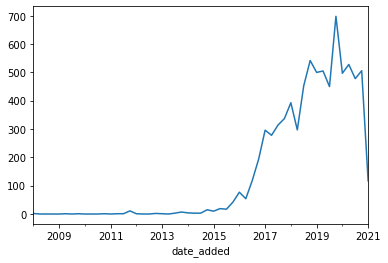

In [146]:
nflx['title'].resample('Q').count().plot();

In [256]:
nflx['title'].resample('Y').count()

date_added
2008-12-31       2
2009-12-31       2
2010-12-31       1
2011-12-31      13
2012-12-31       3
2013-12-31      11
2014-12-31      25
2015-12-31      88
2016-12-31     443
2017-12-31    1225
2018-12-31    1685
2019-12-31    2153
2020-12-31    2009
2021-12-31     117
Freq: A-DEC, Name: title, dtype: int64

넷플릭스는 초창기부터 서서히 콘텐츠를 늘려왔고, 2016년~2016년을 기점으로 폭발적으로 성장했다.<br>
현재 데이터는 시간 별 분포 차이가 심하기 때문에 시간 축을 그대로 사용하는 것은 바람직하지 않다.<br>
전체 기간을 몇 개의 구간으로 분할하여 위와 같이 구간(Y) 별로 너무 많은 데이터가 몰리거나, 너무 적은 데이터만 취합되지 않도록 한다.

In [234]:
# 0부터 7까지, 각각 1111개씩 채워진 리스트 생성
seps = []
for i in range(1,7+1):
    sep = np.ones(1111,dtype=np.int8)*i
    seps.extend(sep)
print(len(seps))

7777


In [255]:
# seps는 숫자로서의 의미가 없다. string으로 변환한다.
nflx['seps'] = seps
nflx['seps'] = nflx['seps'].astype('str')
nflx.dtypes

type                    object
title                   object
country                 object
release_year    datetime64[ns]
rating                  object
duration                 int64
listed_in               object
description             object
seps                    object
dtype: object

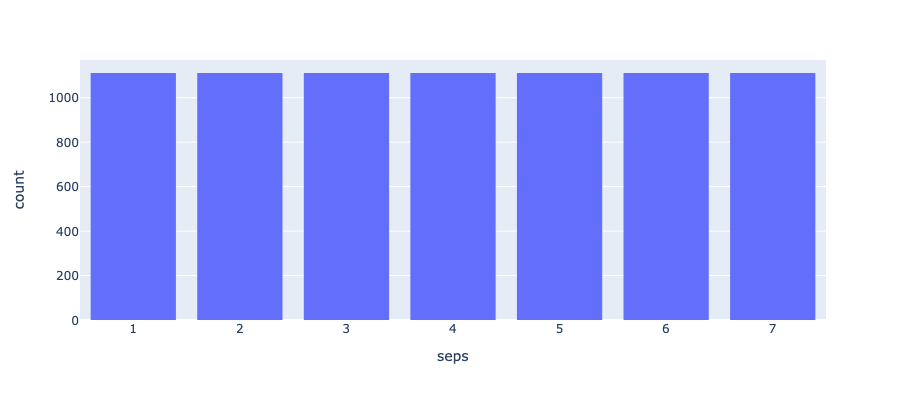

In [254]:
fig = px.histogram(nflx, x='seps')
fig.update_layout(bargap=0.2, width=650, height=400)
fig.show()

총 7777개의 데이터를 시간 순으로 1111개씩 분할하였다.